<b>

<p>
<center>
<font size="6">
Data Mining Project 2
</font>
</center>
</p>

<p>
<center>
<font size="5">
Instagram "ustrip" Check-ins Databease 
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Mining, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Author: Voratham Tiabrat
</font>
</center>
</p>

</b>

# Part 4 : Instagram 'ustrip' Check-ins Database

##  4.1 Preparing Data

In [1]:
import pandas as pd 
import numpy as np
from gmplot import gmplot
from matplotlib import pyplot as plt 
from geopy.geocoders import Nominatim
import plotly
import chart_studio.plotly as py
import plotly.graph_objects as go
py.sign_in('thankuuuu', 'KEwJDOVZyb6iwoblLuQO')
print(plotly.__version__)

4.1.1


In [2]:
Data = pd.read_csv('Location.csv')
Data.head()

,Location,Month,Year,Season,Address,Latitude,Longitude
0,"Las Vegas, Nevada",10,2019,Fall,"Las Vegas, Clark County, Nevada, United States",36.166286,-115.149225
1,"Index, Washington",10,2019,Fall,"Index, Snohomish County, Washington, United St...",47.820831,-121.553891
2,Golden Gate Bridge,10,2019,Fall,"Golden Gate Bridge, Redwood Highway, Waldo, Ma...",37.817616,-122.478312
3,"New Orleans, Louisiana",8,2019,Summer,"New Orleans, Orleans Parish, Louisiana, United...",29.949932,-90.070116
4,"Seven Magic Mountains, Nevada",10,2019,Fall,"Seven Magic Mountains, South Las Vegas Bouleva...",35.838291,-115.270879


In [3]:
Data.shape

(41686, 7)

In [4]:
for i in range (len(Data.index)) :
    if Data.loc[i,'Month'] in [1,2,3,4,5,6,7,8,9] :
        Data.loc[i,'Month'] =  '0'+str(Data.loc[i,'Month'])
        
Data['Date']  = Data.Year.astype(str).str.cat(Data.Month.astype(str), sep='/')
Data.head()

,Location,Month,Year,Season,Address,Latitude,Longitude,Date
0,"Las Vegas, Nevada",10,2019,Fall,"Las Vegas, Clark County, Nevada, United States",36.166286,-115.149225,2019/10
1,"Index, Washington",10,2019,Fall,"Index, Snohomish County, Washington, United St...",47.820831,-121.553891,2019/10
2,Golden Gate Bridge,10,2019,Fall,"Golden Gate Bridge, Redwood Highway, Waldo, Ma...",37.817616,-122.478312,2019/10
3,"New Orleans, Louisiana",08,2019,Summer,"New Orleans, Orleans Parish, Louisiana, United...",29.949932,-90.070116,2019/08
4,"Seven Magic Mountains, Nevada",10,2019,Fall,"Seven Magic Mountains, South Las Vegas Bouleva...",35.838291,-115.270879,2019/10


In [5]:
Data = Data.drop(['Location'],axis =1)
Data = Data.set_index('Address')
Data.head()

,Month,Year,Season,Latitude,Longitude,Date
Address,,,,,,
"Las Vegas, Clark County, Nevada, United States",10,2019,Fall,36.166286,-115.149225,2019/10
"Index, Snohomish County, Washington, United States",10,2019,Fall,47.820831,-121.553891,2019/10
"Golden Gate Bridge, Redwood Highway, Waldo, Marin County, California, 94965, United States of America",10,2019,Fall,37.817616,-122.478312,2019/10
"New Orleans, Orleans Parish, Louisiana, United States",08,2019,Summer,29.949932,-90.070116,2019/08
"Seven Magic Mountains, South Las Vegas Boulevard, Enterprise, Henderson, Clark County, Nevada, 89026, United States of America",10,2019,Fall,35.838291,-115.270879,2019/10


In [6]:
statesheet = pd.read_csv('state-abbrevs.csv')
statelist = statesheet['state'].tolist()
statecode = statesheet['abbreviation'].tolist()
statesheet.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [7]:
#Extracting state from address and adding state code
for address in Data.index:
    for i in range (len(statelist)) :
        if statelist[i] in address :
            Data.loc[address,'State'] = statelist[i]
            Data.loc[address,'Code'] = statecode[i]

In [8]:
Data = Data.dropna()
Data.shape

(38526, 8)

In [9]:
#See how many posts for each year
Data_group = Data.groupby(['Year'])
Data_size = Data_group.size()
Data_size

Year
2011        3
2012       86
2013      218
2014      990
2015     3070
2016     5853
2017     9019
2018    10700
2019     8587
dtype: int64

In [10]:
#Subsetting each year
#Focusing on 2016-1019
Data_2016 = Data.loc[(Data.Year == 2016),]
Data_2017 = Data.loc[(Data.Year == 2017),]
Data_2018 = Data.loc[(Data.Year == 2018),]
Data_2019 = Data.loc[(Data.Year == 2019),]

In [11]:
Data = pd.concat([Data_2016,Data_2017,Data_2018,Data_2019])
Data.shape

(34159, 8)

In [12]:
#Subsetting each month
Data_01 = Data.loc[(Data.Month == '01'),]
Data_02 = Data.loc[(Data.Month == '02'),]
Data_03 = Data.loc[(Data.Month == '03'),]
Data_04 = Data.loc[(Data.Month == '04'),]
Data_05 = Data.loc[(Data.Month == '05'),]
Data_06 = Data.loc[(Data.Month == '06'),]
Data_07 = Data.loc[(Data.Month == '07'),]
Data_08 = Data.loc[(Data.Month == '08'),]
Data_09 = Data.loc[(Data.Month == '09'),]
Data_10 = Data.loc[(Data.Month == '10'),]
Data_11 = Data.loc[(Data.Month == '11'),]
Data_12 = Data.loc[(Data.Month == '12'),]

In [13]:
#Subsetting each season
Spring = Data.loc[(Data.Season == 'Spring'),]
Summer = Data.loc[(Data.Season == 'Summer'),]
Fall = Data.loc[(Data.Season == 'Fall'),]
Winter = Data.loc[(Data.Season == 'Winter'),]

In [14]:
#Total Data
Data_grouped1 = Data.groupby(['Code'])
Data_grouped1_sum = Data_grouped1.size()
Data_grouped1_sum = Data_grouped1_sum.to_frame()
Data_grouped1_sum.columns = ['TOTAL']

In [15]:
#Each Season Data
Data_grouped2 = Spring.groupby(['Code'])
Data_grouped2_sum = Data_grouped2.size()
Data_grouped2_sum = Data_grouped2_sum.to_frame()
Data_grouped2_sum.columns = ['SPRING']

Data_grouped3 = Summer.groupby(['Code'])
Data_grouped3_sum = Data_grouped3.size()
Data_grouped3_sum = Data_grouped3_sum.to_frame()
Data_grouped3_sum.columns = ['SUMMER']

Data_grouped3 = Fall.groupby(['Code'])
Data_grouped3_sum = Data_grouped3.size()
Data_grouped3_sum = Data_grouped3_sum.to_frame()
Data_grouped3_sum.columns = ['FALL']

Data_grouped4 = Winter.groupby(['Code'])
Data_grouped4_sum = Data_grouped4.size()
Data_grouped4_sum = Data_grouped4_sum.to_frame()
Data_grouped4_sum.columns = ['WINTER']

Data_grouped_sum1 = pd.concat([Data_grouped2_sum,Data_grouped3_sum,Data_grouped4_sum], axis=1,sort=False)

In [16]:
#Each Year Data
Data_grouped5 = Data_2016.groupby(['Code'])
Data_grouped5_sum = Data_grouped5.size()
Data_grouped5_sum = Data_grouped5_sum.to_frame()
Data_grouped5_sum.columns = ['2016']

Data_grouped6 = Data_2017.groupby(['Code'])
Data_grouped6_sum = Data_grouped6.size()
Data_grouped6_sum = Data_grouped6_sum.to_frame()
Data_grouped6_sum.columns = ['2017']

Data_grouped7 = Data_2018.groupby(['Code'])
Data_grouped7_sum = Data_grouped7.size()
Data_grouped7_sum = Data_grouped7_sum.to_frame()
Data_grouped7_sum.columns = ['2018']

Data_grouped8 = Data_2019.groupby(['Code'])
Data_grouped8_sum = Data_grouped8.size()
Data_grouped8_sum = Data_grouped8_sum.to_frame()
Data_grouped8_sum.columns = ['2019']

Data_grouped_sum2 = pd.concat([Data_grouped5_sum,Data_grouped6_sum,Data_grouped7_sum,Data_grouped8_sum], axis=1,sort=False)

In [17]:
#Each Year Month
Data_grouped9 = Data_01.groupby(['Code'])
Data_grouped9_sum = Data_grouped9.size()
Data_grouped9_sum = Data_grouped9_sum.to_frame()
Data_grouped9_sum.columns = ['JAN']

Data_grouped10 = Data_02.groupby(['Code'])
Data_grouped10_sum = Data_grouped10.size()
Data_grouped10_sum = Data_grouped10_sum.to_frame()
Data_grouped10_sum.columns = ['FEB']

Data_grouped11 = Data_03.groupby(['Code'])
Data_grouped11_sum = Data_grouped11.size()
Data_grouped11_sum = Data_grouped11_sum.to_frame()
Data_grouped11_sum.columns = ['MAR']

Data_grouped12 = Data_04.groupby(['Code'])
Data_grouped12_sum = Data_grouped12.size()
Data_grouped12_sum = Data_grouped12_sum.to_frame()
Data_grouped12_sum.columns = ['APR']

Data_grouped13 = Data_05.groupby(['Code'])
Data_grouped13_sum = Data_grouped13.size()
Data_grouped13_sum = Data_grouped13_sum.to_frame()
Data_grouped13_sum.columns = ['MAY']

Data_grouped14 = Data_06.groupby(['Code'])
Data_grouped14_sum = Data_grouped14.size()
Data_grouped14_sum = Data_grouped14_sum.to_frame()
Data_grouped14_sum.columns = ['JUN']

Data_grouped15 = Data_07.groupby(['Code'])
Data_grouped15_sum = Data_grouped15.size()
Data_grouped15_sum = Data_grouped15_sum.to_frame()
Data_grouped15_sum.columns = ['JUL']

Data_grouped16 = Data_08.groupby(['Code'])
Data_grouped16_sum = Data_grouped16.size()
Data_grouped16_sum = Data_grouped16_sum.to_frame()
Data_grouped16_sum.columns = ['AUG']

Data_grouped17 = Data_09.groupby(['Code'])
Data_grouped17_sum = Data_grouped17.size()
Data_grouped17_sum = Data_grouped17_sum.to_frame()
Data_grouped17_sum.columns = ['SEP']

Data_grouped18 = Data_10.groupby(['Code'])
Data_grouped18_sum = Data_grouped18.size()
Data_grouped18_sum = Data_grouped18_sum.to_frame()
Data_grouped18_sum.columns = ['OCT']

Data_grouped19 = Data_11.groupby(['Code'])
Data_grouped19_sum = Data_grouped19.size()
Data_grouped19_sum = Data_grouped19_sum.to_frame()
Data_grouped19_sum.columns = ['NOV']

Data_grouped20 = Data_12.groupby(['Code'])
Data_grouped20_sum = Data_grouped20.size()
Data_grouped20_sum = Data_grouped20_sum.to_frame()
Data_grouped20_sum.columns = ['DEC']


Data_grouped_sum3 = pd.concat([Data_grouped9_sum,Data_grouped10_sum,Data_grouped11_sum,Data_grouped12_sum,Data_grouped13_sum,Data_grouped14_sum,Data_grouped15_sum,Data_grouped16_sum,Data_grouped17_sum,Data_grouped18_sum,Data_grouped19_sum,Data_grouped20_sum], axis=1,sort=False)

In [18]:
Data_grouped_sum = pd.concat([Data_grouped1_sum,Data_grouped_sum1,Data_grouped_sum2,Data_grouped_sum3], axis=1,sort=False).fillna(0)
Data_grouped_sum = Data_grouped_sum.reset_index()
Data_grouped_sum = Data_grouped_sum.rename(columns={'index':'Code'})
Data_grouped_sum.head()

,Code,TOTAL,SPRING,FALL,WINTER,2016,2017,2018,2019,JAN,...,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,AK,45,8,5,2.0,10.0,6.0,14,15.0,0.0,...,0.0,2.0,6.0,2.0,17.0,11,3.0,0.0,0.0,0.0
1,AL,53,13,1,11.0,10.0,10.0,14,19.0,1.0,...,4.0,1.0,8.0,5.0,9.0,14,0.0,0.0,0.0,0.0
2,AR,28,4,7,11.0,4.0,8.0,9,7.0,3.0,...,1.0,0.0,3.0,5.0,0.0,1,2.0,0.0,0.0,0.0
3,AZ,2436,647,780,353.0,338.0,559.0,719,820.0,94.0,...,210.0,183.0,254.0,160.0,225.0,271,351.0,0.0,0.0,0.0
4,CA,10393,2719,2878,1737.0,1744.0,2930.0,3334,2385.0,653.0,...,779.0,917.0,1023.0,959.0,981.0,1119,1109.0,0.0,0.0,0.0


##  4.2 Preparing Data for Popular Place Check-ins 

In [19]:
Latitude = Data['Latitude'].tolist()
Longitude = Data['Longitude'].tolist()
Address = Data.index.tolist()

### Preparing Data for Popular Place for All check-ins from 2016 to 2019 

In [20]:
#Sum total visit the same place
Data2 = Data.reset_index()
PopPlace = Data2.groupby(['Address'])
PopPlace_sum = PopPlace.size()
PopPlace_sum = PopPlace_sum.to_frame()
PopPlace_sum.columns = ['Total']

#Find the latitude and longitude for the popular visit place
for place in PopPlace_sum.index :
    for i in range (len(Address)) :
        if place == Address[i] :
            PopPlace_sum.loc[place,'Latitude'] = Latitude[i]
            PopPlace_sum.loc[place,'Longitude'] = Longitude[i]
            
PopPlace_sum.head()

,Total,Latitude,Longitude
Address,,,
"(512) Brewing Company, Austin, Travis County, Texas, United States",1,30.222554,-97.770128
"1 Hotel Brooklyn Bridge, Furman Street, DUMBO, Brooklyn, Kings County, New York, 11201, United States of America",3,40.702338,-73.995524
"1 Wall Street, 1, Wall Street, Financial District, Manhattan Community Board 1, Manhattan, New York County, New York, 10005, United States of America",1,40.707302,-74.011692
"1, 17 Mile Drive, Pacific Grove, Monterey County, California, 93950, United States",1,36.632112,-121.925996
"1, Boston, Heritage Park Apartments, El Camino Real, Irvine, Orange County, California, 92604, United States of America",1,33.696836,-117.775532


In [21]:
#Add State
for address in PopPlace_sum.index:
    for i in range (len(statelist)) :
        if statelist[i] in address :
            PopPlace_sum.loc[address,'State'] = statelist[i]
#Sort by State and total number of check-ins respectively
PopPlace_sum = PopPlace_sum.sort_values(by=['State','Total'], ascending=[True,False])
PopPlace_sum.head()

,Total,Latitude,Longitude,State
Address,,,,
"Cool Springs, St. Clair County, Alabama, 39593, United States",4,33.796766,-86.329147,Alabama
"Fairhope Municipal Pier, Magnolia Beach, Baldwin County, Alabama, United States",3,30.524980,-87.914871,Alabama
"Gulf Shores, Baldwin County, Alabama, United States",3,30.297024,-87.645741,Alabama
"Mobile County, Alabama, United States",3,30.648824,-88.194642,Alabama
"Orange Beach, Baldwin County, Alabama, United States",3,30.294368,-87.573594,Alabama


### Preparing Data for Popular Place for All check-ins of each season

In [22]:
#Sum total visit the same place
PopPlace2 = Data2.groupby(['Address','Season'])
PopPlace_sum2 = PopPlace2.size()
PopPlace_sum2 = PopPlace_sum2.to_frame()
#Add State
for address in PopPlace_sum2.index:
        for i in range (len(statelist)) :
            if statelist[i] in address[0] :
                PopPlace_sum2.loc[address,'State'] = statelist[i]
PopPlace_sum2.head()

0       State
Address                                            Season               
(512) Brewing Company, Austin, Travis County, T... Fall    1       Texas
1 Hotel Brooklyn Bridge, Furman Street, DUMBO, ... Fall    1    New York
                                                   Spring  2    New York
1 Wall Street, 1, Wall Street, Financial Distri... Fall    1    New York
1, 17 Mile Drive, Pacific Grove, Monterey Count... Summer  1  California

In [23]:
#Add State
for address in PopPlace_sum2.index:
    for i in range (len(Address)) :
        if address[0] == Address[i] :
            PopPlace_sum2.loc[address,'Latitude'] = Latitude[i]
            PopPlace_sum2.loc[address,'Longitude'] = Longitude[i]

PopPlace_sum2.head()

0       State  \
Address                                            Season                  
(512) Brewing Company, Austin, Travis County, T... Fall    1       Texas   
1 Hotel Brooklyn Bridge, Furman Street, DUMBO, ... Fall    1    New York   
                                                   Spring  2    New York   
1 Wall Street, 1, Wall Street, Financial Distri... Fall    1    New York   
1, 17 Mile Drive, Pacific Grove, Monterey Count... Summer  1  California   

                                                            Latitude  \
Address                                            Season              
(512) Brewing Company, Austin, Travis County, T... Fall    30.222554   
1 Hotel Brooklyn Bridge, Furman Street, DUMBO, ... Fall    40.702338   
                                                   Spring  40.702338   
1 Wall Street, 1, Wall Street, Financial Distri... Fall    40.707302   
1, 17 Mile Drive, Pacific Grove, Monterey Count... Summer  36.632112   

                                                            Longitude  
Address                                            Season              
(512) Brewing Company, Austin, Travis County, T... Fall    -97.770128  
1 Hotel Brooklyn Bridge, Furman Street, DUMBO, ... Fall    -73.995524  
                                                   Spring  -73.995524  
1 Wall Street, 1, Wall Street, Financial Distri... Fall    -74.011692  
1, 17 Mile Drive, Pacific Grove, Monterey Count... Summer -121.925996

In [24]:
PopSpring = pd.DataFrame()
PopSummer = pd.DataFrame()
PopFall = pd.DataFrame()
PopWinter = pd.DataFrame()
for i in range (len(PopPlace_sum2.index)):
        temp = {'Address': PopPlace_sum2.index[i][0],'Season':PopPlace_sum2.index[i][1],'Total': PopPlace_sum2.iloc[i,0],'State': PopPlace_sum2.iloc[i,1],'Latitude':PopPlace_sum2.iloc[i,2] ,'Longitude':PopPlace_sum2.iloc[i,3]} 
        if PopPlace_sum2.index[i][1] == 'Spring' :
            PopSpring = PopSpring.append(temp, ignore_index=True)
        elif PopPlace_sum2.index[i][1] == 'Summer' :
            PopSummer = PopSummer.append(temp, ignore_index=True)
        elif PopPlace_sum2.index[i][1] == 'Fall' :
            PopFall = PopFall.append(temp, ignore_index=True)
        elif PopPlace_sum2.index[i][1] == 'Winter' :
            PopWinter = PopWinter.append(temp, ignore_index=True)           

In [25]:
#Sort by State and total number of check-ins respectively
PopSpring = PopSpring.sort_values(by=['State','Total'], ascending=[True,False])
PopSummer = PopSummer.sort_values(by=['State','Total'], ascending=[True,False])
PopFall = PopFall.sort_values(by=['State','Total'], ascending=[True,False])
PopWinter = PopWinter.sort_values(by=['State','Total'], ascending=[True,False])
print(PopSpring.shape)
print(PopSummer.shape)
print(PopFall.shape)
print(PopWinter.shape)

(2417, 6)
(2798, 6)
(2582, 6)
(1675, 6)


##  4.3 Preparing Crime, US Index and Temperature Data 

In [26]:
USCrime = pd.read_csv('USCrime.csv')
USIndex = pd.read_csv('USIndex.csv')
Temperature = pd.read_csv('Temperature.csv')

In [27]:
Data3 = pd.concat([Data_2016,Data_2017,Data_2018], ignore_index=True)
Data3.shape

(25572, 8)

In [28]:
Datax = Data3.groupby(['State','Date'])
Datax_sum = Datax.size()
Datax_sum = Datax_sum.to_frame()
Datax_sum.columns = ['Total']
Datax_sum = Datax_sum.unstack().fillna(0)
add = Datax_sum.sum(axis = 0, skipna = True) 
Datax_sum = Datax_sum.transpose()
Datax_sum['All'] = 0 
Datax_sum = Datax_sum.transpose()
Datax_sum.loc['All']['Total'] = [add[0],add[1],add[2],add[3],add[4],add[5],add[6],add[7],add[8],add[9],add[10],add[11],add[12],add[13],add[14],add[15],add[16],add[17],add[18],add[19],add[20],add[21],add[22],add[23],add[24],add[25],add[26],add[27],add[28],add[29],add[30],add[31],add[32],add[33],add[34],add[35]]

Datax_sum.tail()

Total                                                          \
Date          2016/01 2016/02 2016/03 2016/04 2016/05 2016/06 2016/07 2016/08   
State                                                                           
Washington       13.0     5.0    26.0    16.0    36.0    26.0    25.0    32.0   
West Virginia     0.0     0.0     0.0     1.0     0.0     0.0     0.0     1.0   
Wisconsin         1.0     3.0     2.0     0.0     1.0     3.0     2.0     0.0   
Wyoming           0.0     0.0     2.0     4.0     1.0     2.0     6.0     4.0   
All             251.0   196.0   393.0   438.0   452.0   395.0   599.0   647.0   

                                ...                                            \
Date          2016/09 2016/10   ...   2018/03 2018/04 2018/05 2018/06 2018/07   
State                           ...                                             
Washington       33.0    28.0   ...      64.0    41.0    66.0    57.0    92.0   
West Virginia     0.0     0.0   ...       0.0     0.0     0.0     1.0     4.0   
Wisconsin         1.0     0.0   ...       0.0     0.0     5.0     2.0     4.0   
Wyoming          25.0     3.0   ...       0.0     2.0     8.0     0.0     4.0   
All             733.0   676.0   ...     725.0   694.0  1110.0   887.0   993.0   

                                                       
Date          2018/08 2018/09 2018/10 2018/11 2018/12  
State                                                  
Washington       68.0    85.0    73.0    48.0    40.0  
West Virginia     1.0     1.0     0.0     0.0     0.0  
Wisconsin        10.0     4.0     6.0    14.0     0.0  
Wyoming          11.0    12.0    19.0    14.0     5.0  
All            1187.0  1287.0  1184.0   765.0   566.0  

[5 rows x 36 columns]

###  Preparing Data for Temperature and Check-ins Plot 

In [29]:
Temperature = Temperature.drop(['Anomaly','Season'],axis=1)
Temperature = Temperature.set_index('State')
Temperature = Temperature[Temperature.Year != 2019]
Temperature['Date']  = Temperature.Year.astype(str).str.cat('0'+Temperature.Month.astype(str), sep='/')
Temperature = Temperature.drop(['Month','Year'],axis=1)
Temperature.rename(columns={'Value':'Temp'},inplace=True)
AvgTemp = Temperature.copy()
AvgTemp = AvgTemp.groupby('Date')['Temp'].sum().reset_index()
AvgTemp['Temp'] = AvgTemp['Temp']/49
AvgTemp['State'] = 'All'
Temperature = Temperature.reset_index()
Temperature = pd.concat([Temperature,AvgTemp], axis=0,sort = True)
Temperature = Temperature.set_index('State')

Temperature.tail()

,Date,Temp
State,,
All,2018/05,64.983673
All,2018/06,70.404082
All,2018/07,74.502041
All,2018/08,73.114286
All,2018/09,67.538776


In [30]:
#See how many posts for each year
Data_dategroup = Data3.groupby(['Date'])
Data_datesize = Data_dategroup.size()
Data_datesize = Data_datesize.to_frame()
Data_datesize.columns = ['Total']
Data_datesize = Data_datesize.transpose()
Data_datesize

Date,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,...,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12
Total,251,196,393,438,452,395,599,647,733,676,...,725,694,1110,887,993,1187,1287,1184,765,566


### Preparing Data for US Index and Check-ins Plot 

In [31]:
USIndex.rename(columns={'date':'Date'},inplace=True)
USIndex = USIndex[USIndex.Year != 2019]
for i in range (len(USIndex.index)) :
    if USIndex.loc[i,'Month'] in [1,2,3,4,5,6,7,8,9] :
        USIndex.loc[i,'Month'] =  '0'+str(USIndex.loc[i,'Month'])
        
USIndex['Date']  = USIndex.Year.astype(str).str.cat(USIndex.Month.astype(str), sep='/')
USIndex.head()

,Date,value,Month,Year,Season
0,2016/01,101.077,01,2016,Winter
1,2016/02,99.728,02,2016,Winter
2,2016/03,97.693,03,2016,Spring
3,2016/04,96.341,04,2016,Spring
4,2016/05,97.419,05,2016,Spring


In [32]:
USIndex = USIndex.drop(['Month','Year','Season'],axis=1)
USIndex.rename(columns={' value':'USIndex'},inplace=True)
USIndex = USIndex.set_index('Date')
USIndex = USIndex.transpose()
USIndex.head()

Date,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,...,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12
USIndex,101.077,99.728,97.693,96.341,97.419,97.802,98.294,97.514,98.26,99.18,...,95.011,94.997,97.522,99.017,99.335,100.28,100.262,100.903,101.974,102.002


### Preparing Data for Crime Per Population and Check-ins Plot 

In [33]:
USCrime['Crime/Population'] = USCrime['Total']/USCrime['population']
USCrime = USCrime.set_index('State')
for state in USCrime.index :
    for i in range (len(statecode)):
        if statecode[i] == state:
            USCrime.loc[state,'State'] = statelist[i]

USCrime = USCrime.fillna('All')
USCrime = USCrime.set_index('State')
USCrime.head()

,year,population,violent_crime,homicide,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,Total,Crime/Population
State,,,,,,,,,,,,,
All,2016,323405935,1285606,17413,132414.0,332797,802982,7928530,1516405,5644835,767290,18428272.0,0.056982
Alaska,2016,741522,5966,52,1053.0,850,4011,24876,4053,17766,3057,61684.0,0.083186
Alabama,2016,4860545,25878,407,1915.0,4687,18869,143259,34045,97498,11716,338274.0,0.069596
Arkansas,2016,2988231,16563,217,2214.0,2125,12007,98092,23814,67091,7187,229310.0,0.076738
Arizona,2016,6908642,32542,389,3304.0,7045,21804,207317,38216,150618,18483,479718.0,0.069437


In [34]:
USCrime2 = USCrime.loc[:,['year','Crime/Population']]
USCrime2 = USCrime2.sort_index()
USCrime2.head()

,year,Crime/Population
State,,
Alabama,2016,0.069596
Alabama,2018,0.066736
Alabama,2017,0.069431
Alaska,2016,0.083186
Alaska,2018,0.083709


In [35]:
Data_grouped_sum3 = Data_grouped_sum2.copy()
for state in Data_grouped_sum3.index :
    for i in range (len(statecode)):
        if statecode[i] == state:
            Data_grouped_sum3 = Data_grouped_sum3.rename(index={state:statelist[i]})   
Data_grouped_sum3 = Data_grouped_sum3.loc[:,['2016','2017','2018']]
Data_grouped_sum3 = Data_grouped_sum3.fillna(0)
add2 = Data_grouped_sum3.sum(axis = 0) 
Data_grouped_sum3.loc['All'] = [add2[0], add2[1], add2[2]]
Data_grouped_sum3.tail()

,2016,2017,2018
West Virginia,2.0,5.0,8.0
Wyoming,48.0,37.0,76.0
Rhode Island,0.0,7.0,38.0
District of Columbia,0.0,0.0,3.0
All,5853.0,9019.0,10700.0


## Instagram Check-ins Database

Welcome to US Popular Place to Check-ins Database

1. Geomap of Total Check-ins by each state
2. Total Check-ins by each state from JAN2016 to OCT2019
3. Top Popular Check-ins
4. Geomap of Top Popular Check-ins
5. Check-ins vs US Index
6. Check-ins vs Temperature
7. Check-ins vs Crime Rate
8. State name sheet
q. Quit the program

Please type "8" for each state name for input

Make a selection: 1

Input can be year(2016-2019), season(Spring,Summer,Fall,Winter) and month(JAN-DEC)
Type "Total" for all data from 2016-2019

Enter input : Total
Data from 01/01/2016 to 10/29/2019



1. Geomap of Total Check-ins by each state
2. Total Check-ins by each state from JAN2016 to OCT2019
3. Top Popular Check-ins
4. Geomap of Top Popular Check-ins
5. Check-ins vs US Index
6. Check-ins vs Temperature
7. Check-ins vs Crime Rate
8. State name sheet
q. Quit the program

Please type "8" for each state name for input

Make a selection: 2

Input State name starting with Capital Letter (input 'All' to see all state)
For State name guideline, please selection "8" on the main menu

Enter State : All


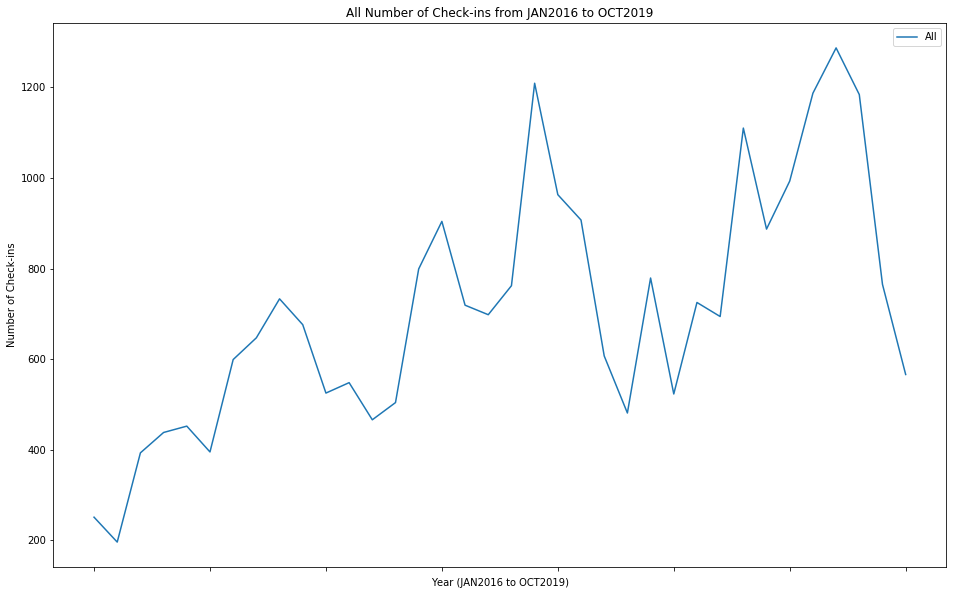


1. Geomap of Total Check-ins by each state
2. Total Check-ins by each state from JAN2016 to OCT2019
3. Top Popular Check-ins
4. Geomap of Top Popular Check-ins
5. Check-ins vs US Index
6. Check-ins vs Temperature
7. Check-ins vs Crime Rate
8. State name sheet
q. Quit the program

Please type "8" for each state name for input

Make a selection: 3

Input Season (input 'All' to see all season)

Enter Season (Spring,Summer,Fall,Winter) : All

Input State name starting with Capital Letter (input 'All' to see all state)
For State name guideline, please selection "8" on the main menu

Enter State : All

Input Number of Place to show

Enter number : 10
Top 10 Poplular Place Check-ins from 01/01/2016 to 10/29/2019 of All
                                                         State  Total
Address                                                              
New York, United States of America                    New York   1017
San Francisco, San Francisco City and County, C...  California    9


1. Geomap of Total Check-ins by each state
2. Total Check-ins by each state from JAN2016 to OCT2019
3. Top Popular Check-ins
4. Geomap of Top Popular Check-ins
5. Check-ins vs US Index
6. Check-ins vs Temperature
7. Check-ins vs Crime Rate
8. State name sheet
q. Quit the program

Please type "8" for each state name for input

Make a selection: 5


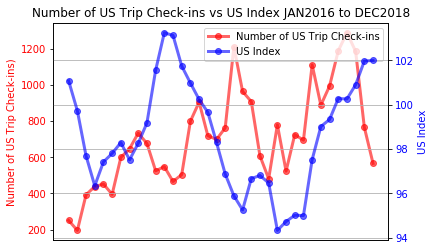


1. Geomap of Total Check-ins by each state
2. Total Check-ins by each state from JAN2016 to OCT2019
3. Top Popular Check-ins
4. Geomap of Top Popular Check-ins
5. Check-ins vs US Index
6. Check-ins vs Temperature
7. Check-ins vs Crime Rate
8. State name sheet
q. Quit the program

Please type "8" for each state name for input

Make a selection: 6

Input State name starting with Capital Letter (input 'All' to see for all state)
For State name guideline, please selection "8" on the main menu

Enter input : All


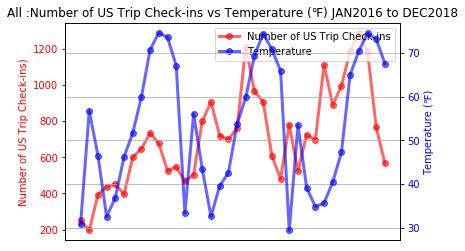


1. Geomap of Total Check-ins by each state
2. Total Check-ins by each state from JAN2016 to OCT2019
3. Top Popular Check-ins
4. Geomap of Top Popular Check-ins
5. Check-ins vs US Index
6. Check-ins vs Temperature
7. Check-ins vs Crime Rate
8. State name sheet
q. Quit the program

Please type "8" for each state name for input

Make a selection: 7

Input State name starting with Capital Letter (input 'All' to see for all state)
For State name guideline, please selection "8" on the main menu

Enter input : All


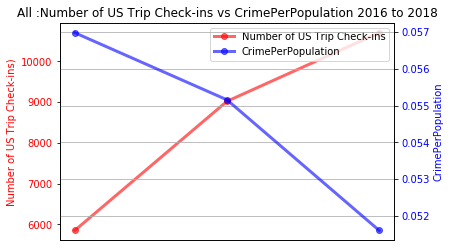


1. Geomap of Total Check-ins by each state
2. Total Check-ins by each state from JAN2016 to OCT2019
3. Top Popular Check-ins
4. Geomap of Top Popular Check-ins
5. Check-ins vs US Index
6. Check-ins vs Temperature
7. Check-ins vs Crime Rate
8. State name sheet
q. Quit the program

Please type "8" for each state name for input

Make a selection: q


In [45]:
def menu():
    print()
    print('1. Geomap of Total Check-ins by each state')
    print('2. Total Check-ins by each state from JAN2016 to OCT2019')
    print('3. Top Popular Check-ins')
    print('4. Geomap of Top Popular Check-ins')
    print('5. Check-ins vs US Index')
    print('6. Check-ins vs Temperature')
    print('7. Check-ins vs Crime Rate')
    print('8. State name sheet')
    print('q. Quit the program')
    print()
    print('Please type "8" for each state name for input')
    print()

def processRequest(selection):
    if selection == '1':
        Geomapplot(selection)
    elif selection == '2':
        NumberCheckins(selection)    
    elif selection == '3':
        PopCheckins(selection)
    elif selection == '4':
        GeoPopCheckins(selection)
    elif selection == '5':
        CheckinsVSUSIndex(selection)
    elif selection == '6':
        CheckinsVSTemp(selection)
    elif selection == '7':
        CheckinsVSCrime(selection)  
    elif selection == '8':
        StateNameSheet(selection) 
    else:
        return 'q' 

#using plotly to draw a choropleth map of a US
def Geomapplot(selection):
    print()
    print('Input can be year(2016-2019), season(Spring,Summer,Fall,Winter) and month(JAN-DEC)')
    print('Type "Total" for all data from 2016-2019')
    print()
    search = input('Enter input : ').upper().replace(" ","")
    
    try :
        fig = go.Figure(data=go.Choropleth(
            locations=Data_grouped_sum['Code'], 
            z = Data_grouped_sum[search].astype(float),
            locationmode = 'USA-states', 
            colorscale = 'Greens',
            colorbar_title ='Number of Check-ins',
        ))

        fig.update_layout(
            title_text = search + ' Number of Instagram Check-ins',
            geo_scope='usa',
        )
        print('Data from 01/01/2016 to 10/29/2019')
        fig.show()
                       
    except :
        print()
        print('Error : Typing Wrong Input')
                       

def NumberCheckins(selection):
    print()
    print("Input State name starting with Capital Letter (input 'All' to see all state)")
    print('For State name guideline, please selection "8" on the main menu')
    print()
    state = input('Enter State : ')
    
    try :
        Plot = Datax_sum.loc[state].plot(legend=True, figsize=(16,10),title = state + ' Number of Check-ins from JAN2016 to OCT2019')
        Plot.set_ylabel('Number of Check-ins')
        Plot.set_xlabel('Year (JAN2016 to OCT2019)')
        plt.show()
    
    except :
        print()
        print('Error : Typing Wrong State Name or no Data for this state')
        print('Please selection "8" on the main menu to see all state name')
        
def PopCheckins(selection):
    print()
    print("Input Season (input 'All' to see all season)")
    print()
    season = input('Enter Season (Spring,Summer,Fall,Winter) : ').upper().replace(" ","")
    print()
    print("Input State name starting with Capital Letter (input 'All' to see all state)")
    print('For State name guideline, please selection "8" on the main menu')
    print()
    state = input('Enter State : ')
    print()
    print('Input Number of Place to show')
    print()
    number = input('Enter number : ')
    seasonlist = ['SUMMER','WINTER','FALL','SPRING']
    
    if season == 'ALL':
        PopPlaceState = PopPlace_sum.sort_values(by=['Total'], ascending=False)
        
        try :
            if state != 'All':
                PopPlaceState = PopPlace_sum.loc[(PopPlace_sum.State == state),]
            PopPlaceState = PopPlaceState.loc[:,['State','Total']]
            print('Top ' + number + ' Poplular Place Check-ins from 01/01/2016 to 10/29/2019 of ' + state)
            print(PopPlaceState.head(int(number)))

        except :
            print()
            print('Error : Typing Wrong State Name or no Data for this state')
            print('Please selection "8" on the main menu to see all state name')
    
    elif season in seasonlist:
        if season == 'SPRING':
            dataframe = PopSpring 
        elif season == 'SUMMER':
            dataframe = PopSummer 
        elif season == 'FALL':
            dataframe = PopFall 
        elif season == 'WINTER':
            dataframe = PopWinter    
    
        try :
            if state != 'All':
                dataframe = dataframe.loc[(dataframe.State == state),]   
                
            PopPlaceState = dataframe.sort_values(by=['Total'], ascending=False)
            PopPlaceState = PopPlaceState.loc[:,['Address','State','Total']]
            PopPlaceState = PopPlaceState.set_index('Address')
            print('Top '+ number + ' Poplular Place Check-ins on '+ season + ' of ' + state)
            print(PopPlaceState.head(int(number)))

        except :
            print()
            print('Error : Typing Wrong State Name or no Data for this state in this season')
            print('Please selection "8" on the main menu to see all state name')
          
    else :
        print()
        print('Error : Typing Wrong Season')

def GeoPopCheckins(selection):
    print()
    print("Input Season (input 'All' to see all season)")
    print()
    season = input('Enter Season (Spring,Summer,Fall,Winter) : ').upper().replace(" ","")
    print()
    print("Input State name starting with Capital Letter (input 'All' to see all state)")
    print('For State name guideline, please selection "8" on the main menu')
    print()
    state = input('Enter State : ')
    print()
    print('Input Number of Place to show')
    print()
    number = input('Enter number : ')
    seasonlist = ['SUMMER','WINTER','FALL','SPRING']
    
    if season == 'ALL':
        Pop = PopPlace_sum.sort_values(by=['Total'], ascending=False)
        if state != 'All':
               Pop =  Pop.loc[(Pop.State == state),]
        Pop = Pop.head(int(number))
        
        try :
            scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
            [0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
            [0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

            fig = go.Figure(data=go.Scattergeo(
                    locationmode = 'USA-states',
                    lat = Pop['Latitude'],
                    lon = Pop['Longitude'],
                    text = Pop.index + ', ' + Pop['State'] + ', ' + 'Check-ins: ' +Pop['Total'].astype(str),
                    mode = 'markers',
                    marker = dict(
                        size = 5,
                        opacity = 0.8,
                        reversescale = True,
                        autocolorscale = False,
                        line = dict(
                            width=1,
                            color='rgba(102, 102, 102)'
                        ),
                        colorscale = scl,
                        color = Pop['Total'],
                        cmax = Pop['Total'].max(),
                        colorbar_title="Number of Check-ins"
                    )))

            fig.update_layout(
                    title = 'Top ' + number + ' of '+ state + ' Most Check-ins Place',
                    geo = dict(
                        scope='usa',
                        projection_type='albers usa',
                        showland = True,
                        landcolor = "rgb(250, 250, 250)",
                        subunitcolor = "rgb(217, 217, 217)",
                        countrycolor = "rgb(217, 217, 217)",
                        countrywidth = 0.5,
                        subunitwidth = 0.5
                    ),
                )
            fig.show()
        except :
            print()
            print('Error : Typing Wrong State Name or no Data for this state')
            print('Please selection "8" on the main menu to see all state name')
       
    elif season in seasonlist:
        if season == 'SPRING':
            dataframe = PopSpring 
        elif season == 'SUMMER':
            dataframe = PopSummer 
        elif season == 'FALL':
            dataframe = PopFall 
        elif season == 'WINTER':
            dataframe = PopWinter 
        
        if state != 'All':
            dataframe =  dataframe.loc[(dataframe.State == state),]
        
        try :
            Pop = dataframe
            Pop = Pop.set_index('Address')
            Pop = Pop.sort_values(by=['Total'], ascending=False)
            Pop = Pop.head(int(number))
            
            scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
            [0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
            [0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

            fig = go.Figure(data=go.Scattergeo(
                    locationmode = 'USA-states',
                    lat = Pop['Latitude'],
                    lon = Pop['Longitude'],
                    text = Pop.index + ', ' + Pop['State'] + ', ' + 'Check-ins: ' +Pop['Total'].astype(str),
                    mode = 'markers',
                    marker = dict(
                        size = 5,
                        opacity = 0.8,
                        reversescale = True,
                        autocolorscale = False,
                        line = dict(
                            width=1,
                            color='rgba(102, 102, 102)'
                        ),
                        colorscale = scl,
                        color = Pop['Total'],
                        cmax = Pop['Total'].max(),
                        colorbar_title="Number of Check-ins"
                    )))

            fig.update_layout(
                    title = 'Top ' + number + ' of '+state + ' Most Check-ins Place in '+ season,
                    geo = dict(
                        scope='usa',
                        projection_type='albers usa',
                        showland = True,
                        landcolor = "rgb(250, 250, 250)",
                        subunitcolor = "rgb(217, 217, 217)",
                        countrycolor = "rgb(217, 217, 217)",
                        countrywidth = 0.5,
                        subunitwidth = 0.5
                    ),
                )
            fig.show()
       
            
        except :
            print()
            print('Error : Typing Wrong State Name or no Data for this state in this season')
            print('Please selection "8" on the main menu to see all state name')
            
    else :
        print()
        print('Error : Typing Wrong Season')
        
def CheckinsVSUSIndex(selection):
    #combine two graph with different y-axis
    fig, ax1 = plt.subplots()
    ax2 = fig.add_axes()
    ax2 = ax1.twinx()

    #First graph plot
    ax1.set_ylabel('Number of US Trip Check-ins)', color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    lns1 = ax1.plot(Data_datesize.loc['Total'], color='red', lw=3, alpha= 0.6, label='Number of US Trip Check-ins', marker='o')

    #Second graph plot
    ax2.set_ylabel('US Index', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    lns2 = ax2.plot(USIndex.loc['USIndex'], color='blue', lw=3, alpha= 0.6, label='US Index', marker='o')

    plt.title('Number of US Trip Check-ins vs US Index JAN2016 to DEC2018') 
    # Label 2 line in the graph
    leg = lns1 + lns2
    labs = [l.get_label() for l in leg]
    ax1.legend(leg, labs, loc=1)
    plt.grid()
    plt.xticks([])
    plt.show()

def CheckinsVSTemp(selection):
    print()
    print("Input State name starting with Capital Letter (input 'All' to see for all state)")
    print('For State name guideline, please selection "8" on the main menu')
    print()
    state = input('Enter input : ')
    try :
        Checkins = Datax_sum.loc[state]
        Checkins = Checkins.loc['Total']
        Checkins = Checkins.to_frame()
        
        Temp = Temperature[Temperature.index == state]
        Temp = Temp.loc[:,('Date','Temp')]
        Temp = Temp.set_index('Date')

        #combine two graph with different y-axis
        fig, ax1 = plt.subplots()
        ax2 = fig.add_axes()
        ax2 = ax1.twinx()

        #First graph plot
        ax1.set_ylabel('Number of US Trip Check-ins)', color='red')
        ax1.tick_params(axis='y', labelcolor='red')
        lns1 = ax1.plot(Checkins, color='red', lw=3, alpha= 0.6, label='Number of US Trip Check-ins', marker='o')

        #Second graph plot
        ax2.set_ylabel('Temperature (℉)', color='blue')
        ax2.tick_params(axis='y', labelcolor='blue')
        lns2 = ax2.plot(Temp, color='blue', lw=3, alpha= 0.6, label='Temperature', marker='o')

        plt.title(state + ' :Number of US Trip Check-ins vs Temperature (℉) JAN2016 to DEC2018') 
        # Label 2 line in the graph
        leg = lns1 + lns2
        labs = [l.get_label() for l in leg]
        ax1.legend(leg, labs, loc=1)
        plt.grid()
        plt.xticks([])
        plt.show() 
    except :
        print()
        print('Error : Typing Wrong State Name or no Data for this state')
        print('Please selection "8" on the main menu to see all state name') 

def CheckinsVSCrime(selection):
    print()
    print("Input State name starting with Capital Letter (input 'All' to see for all state)")
    print('For State name guideline, please selection "8" on the main menu')
    print()
    state = input('Enter input : ')
    try :
        Crime = USCrime2[USCrime2.index == state]
        Crime = Crime.loc[:,('year','Crime/Population')]
        Crime = Crime.set_index('year')
        Crime = Crime.sort_index()

        Checkins = Data_grouped_sum3.loc[state].to_frame()
        Checkins.index.name = 'year'
        Checkins.index = Checkins.index.astype(str).astype(int)

        #combine two graph with different y-axis
        fig, ax1 = plt.subplots()
        ax2 = fig.add_axes()
        ax2 = ax1.twinx()

        #First graph plot
        ax1.set_ylabel('Number of US Trip Check-ins)', color='red')
        ax1.tick_params(axis='y', labelcolor='red')
        lns1 = ax1.plot(Checkins, color='red', lw=3, alpha= 0.6, label='Number of US Trip Check-ins', marker='o')

        #Second graph plot
        ax2.set_ylabel('CrimePerPopulation', color='blue')
        ax2.tick_params(axis='y', labelcolor='blue')
        lns2 = ax2.plot(Crime, color='blue', lw=3, alpha= 0.6, label='CrimePerPopulation', marker='o')

        plt.title(state + ' :Number of US Trip Check-ins vs CrimePerPopulation 2016 to 2018') 
        # Label 2 line in the graph
        leg = lns1 + lns2
        labs = [l.get_label() for l in leg]
        ax1.legend(leg, labs, loc=1)
        plt.grid()
        plt.xticks([])
        plt.show()
     
    except :
        print()
        print('Error : Typing Wrong State Name or no Data for this state')
        print('Please selection "8" on the main menu to see all state name')    

def StateNameSheet(selection) :
    statenamesheet = statesheet.copy()
    statenamesheet = statenamesheet.set_index('state')
    print(statenamesheet)

def main():
    print('Welcome to US Popular Place to Check-ins Database')     
    selection = ''
    while selection != 'q':
        menu()
        selection = input('Make a selection: ')
        response = processRequest(selection)
        if response == 'q':
            break
                                 
main()